## Prerequisite

Make sure you ran `snakemake` in this directory and have obtained all the files (stored under `output/`).

## Load and visualize the predictions

In [1]:
# Gloal 
models = ['DeepSEA/variantEffects', 'Basset', 'DeepBind/Homo_sapiens/TF/D00328.018_ChIP-seq_CTCF']

### Loading predictions from the tsv output

In [2]:
import kipoi
import seaborn as sns
import pandas as pd

In [3]:
merge_cols = ['variant_chr', 'variant_pos', 'variant_ref', 'variant_alt', 'variant_id', 'line_idx', 'vcf_set']

In [7]:
def read_preds_tsv(model, vcf_set, output_dir):
    df = pd.read_table("{}/{}/{}.tsv".format(output_dir, model, vcf_set))
    df['vcf_set'] = vcf_set
    df.set_index(merge_cols, inplace=True)
    assert df.columns.str.startswith("preds").all()
    
    # TODO - update
    df.columns = df.columns.str.replace("preds", model)
    
    if len(df.columns) > 1:
        # multi-task model
        try:
            descr = kipoi.get_model_descr(model)
            df.columns = model + "/" + pd.Series(descr.schema.targets.column_labels)
        except:
            pass
    return df

In [8]:
df = pd.concat([read_preds_tsv(m, vcf_set='variants', output_dir='output') for m in models], axis=1)

In [24]:
df.head()

DeepSEA/variantEffects/alt/8988T_DNase_None  \
variant_chr variant_pos variant_ref variant_alt variant_id line_idx               vcf_set                                                 
chr22       21541590    A           T           rs1111     chr22:21541590:A:['T'] variants                    0.0028                      
            21541952    C           C           rs1112     chr22:21541952:C:['C'] variants                    0.0027                      
            30630220    T           G           rs1113     chr22:30630220:T:['G'] variants                    0.0380                      
            30630701    A           G           rs1114     chr22:30630701:A:['G'] variants                    0.0002                      
            35503223    C           A           rs1115     chr22:35503223:C:['A'] variants                    0.0009                      

                                                                                            DeepSEA/variantEffects/alt/A549_ATF3_EtOH_0.02pct  \
variant_chr variant_pos variant_ref variant_alt variant_id line_idx               vcf_set                                                       
chr22       21541590    A           T           rs1111     chr22:21541590:A:['T'] variants                    0.0003                            
            21541952    C           C           rs1112     chr22:21541952:C:['C'] variants                    0.0003                            
            30630220    T           G           rs1113     chr22:30630220:T:['G'] variants                    0.0003                            
            30630701    A           G           rs1114     chr22:30630701:A:['G'] variants                    0.0002                            
            35503223    C           A           rs1115     chr22:35503223:C:['A'] variants                    0.0015                            

                                                                                            DeepSEA/variantEffects/alt/A549_BCL3_EtOH_0.02pct  \
variant_chr variant_pos variant_ref variant_alt variant_id line_idx               vcf_set                                                       
chr22       21541590    A           T           rs1111     chr22:21541590:A:['T'] variants                    0.0010                            
            21541952    C           C           rs1112     chr22:21541952:C:['C'] variants                    0.0007                            
            30630220    T           G           rs1113     chr22:30630220:T:['G'] variants                    0.0014                            
            30630701    A           G           rs1114     chr22:30630701:A:['G'] variants                    0.0007                            
            35503223    C           A           rs1115     chr22:35503223:C:['A'] variants                    0.0023                            

                                                                                            DeepSEA/variantEffects/alt/A549_BHLHE40_None  \
variant_chr variant_pos variant_ref variant_alt variant_id line_idx               vcf_set                                                  
chr22       21541590    A           T           rs1111     chr22:21541590:A:['T'] variants                8.4150e-05                       
            21541952    C           C           rs1112     chr22:21541952:C:['C'] variants                8.0684e-05                       
            30630220    T           G           rs1113     chr22:30630220:T:['G'] variants                4.1612e-04                       
            30630701    A           G           rs1114     chr22:30630701:A:['G'] variants                4.3835e-05                       
            35503223    C           A           rs1115     chr22:35503223:C:['A'] variants                7.4565e-05                       

                                                                                            DeepSEA/varia

Text(34,0.5,'Variant')

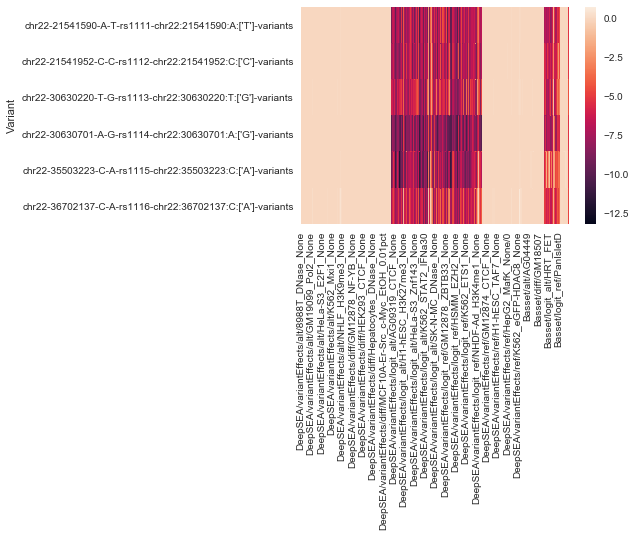

In [10]:
sns.heatmap(df)
plt.ylabel("Variant")

### Loading predictions from the hdf5 output

In [11]:
from kipoi.readers import HDF5Reader

List of entries:

In [14]:
f = "output/Basset/variants.h5"

In [15]:
r = HDF5Reader(f)
r.open()

In [16]:
r.ls()

[('/line_idx', <HDF5 dataset "line_idx": shape (6,), type "|O">),
 ('/preds/alt/8988T', <HDF5 dataset "8988T": shape (6,), type "<f4">),
 ('/preds/alt/A549', <HDF5 dataset "A549": shape (6,), type "<f4">),
 ('/preds/alt/ADRL_GLND_FET',
  <HDF5 dataset "ADRL_GLND_FET": shape (6,), type "<f4">),
 ('/preds/alt/AG04449', <HDF5 dataset "AG04449": shape (6,), type "<f4">),
 ('/preds/alt/AG04450', <HDF5 dataset "AG04450": shape (6,), type "<f4">),
 ('/preds/alt/AG09309', <HDF5 dataset "AG09309": shape (6,), type "<f4">),
 ('/preds/alt/AG09319', <HDF5 dataset "AG09319": shape (6,), type "<f4">),
 ('/preds/alt/AG10803', <HDF5 dataset "AG10803": shape (6,), type "<f4">),
 ('/preds/alt/AoAF', <HDF5 dataset "AoAF": shape (6,), type "<f4">),
 ('/preds/alt/AoSMC', <HDF5 dataset "AoSMC": shape (6,), type "<f4">),
 ('/preds/alt/BE2_C', <HDF5 dataset "BE2_C": shape (6,), type "<f4">),
 ('/preds/alt/BJ', <HDF5 dataset "BJ": shape (6,), type "<f4">),
 ('/preds/alt/BLD_CD14_PC',
  <HDF5 dataset "BLD_CD14_

In [17]:
# load the values
d = HDF5Reader.load(f, unflatten=False)

In [20]:
list(d.keys())[:5]

['/line_idx',
 '/preds/alt/8988T',
 '/preds/alt/A549',
 '/preds/alt/ADRL_GLND_FET',
 '/preds/alt/AG04449']

In [21]:
def df2index(df):
    return pd.MultiIndex.from_arrays([df.values[:,i] for i in range(df.shape[1])], names=list(df.columns))


def read_preds_h5(model, vcf_set, output_dir, scoring_fn='diff'):
    d = HDF5Reader.load("{}/{}/{}.h5".format(output_dir, model, vcf_set), unflatten=False)
    preds = d.pop(f"/preds/{scoring_fn}/{model}_prb")
    
    if preds.ndim == 1:
        preds = preds[:, np.newaxis]
    assert preds.ndim == 2  # this example works only with 2 dim output arrays
    
    metadata_table = pd.DataFrame(d)
    metadata_table.columns = metadata_table.columns.str.replace("^/", "")
    metadata_table['vcf_set'] = vcf_set
    metadata_table = metadata_table[merge_cols]  # re-order
    
    if preds.shape[1] > 1 and model != 'Basset':
        # TODO - remove
        descr = kipoi.get_model_descr(model)
        return pd.DataFrame(preds, 
                            columns=model + "/" + pd.Series(descr.schema.targets.column_labels),
                            index=df2index(metadata_table))
    else:
        return pd.DataFrame(preds, columns = model + "/" + pd.Series(np.arange(preds.shape[1]), dtype=str),
                            index=df2index(metadata_table))

In [22]:
df = pd.concat([read_preds_h5(m, 'variants', output_dir='output') for m in models], axis=1)

KeyError: '/preds/diff/DeepSEA/variantEffects_prb'

In [ ]:
df.head()